In [1]:
!pip install seaborn


[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# Import required Python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# 1. Load the original OWID CO₂ dataset
df_raw = pd.read_csv("../../co2-data/owid-co2-data.csv")

# 2. Select only the columns needed for the analysis
cols = [
    "country",
    "year",
    "co2",             # total CO₂ emissions (million tonnes)
    "co2_per_capita",  # CO₂ emissions per person (tonnes)
    "population",
    "gdp"              # Gross Domestic Product (USD, current)
]
df = df_raw[cols].copy()

# 3. Select the countries/entities used in the study
selected_entities = [
    "World",
    "China",
    "United States",
    "India",
    "Russia",
    "Japan",
    "Iran"
]

df = df[df["country"].isin(selected_entities)].copy()

# 4. Limit the time range to 1960–2022
df = df[(df["year"] >= 1960) & (df["year"] <= 2022)].copy()

# 5. Remove rows where CO₂ or per-capita values are missing
df = df.dropna(subset=["co2", "co2_per_capita"])

# 6. Save the cleaned dataset for future use
df.to_csv("clean_co2_dataset.csv", index=False)

df.head()

,country,year,co2,co2_per_capita,population,gdp
9869,China,1960,798.811,1.220,654802068.0,7.050930e+11
9870,China,1961,570.641,0.870,655773484.0,5.771284e+11
9871,China,1962,459.625,0.691,665073690.0,6.165030e+11
9872,China,1963,456.787,0.667,684552646.0,7.055344e+11
9873,China,1964,460.644,0.654,704798263.0,8.045050e+11


In [5]:
# Helper function to save and display figures
def save_and_show(fig, filename, dpi=300):
    """
    fig: Matplotlib figure object
    filename: output file name (PNG)
    dpi: resolution of image
    """
    fig.tight_layout()
    fig.savefig(filename, dpi=dpi, bbox_inches="tight")
    plt.show()

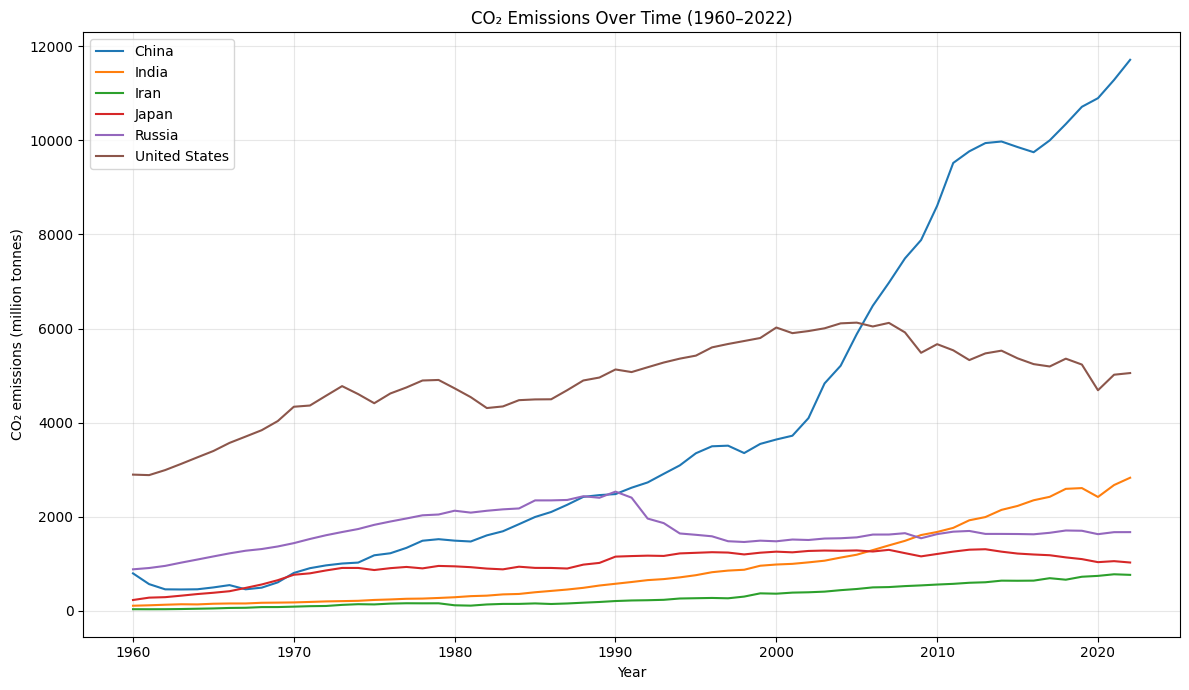

In [6]:
# Load cleaned dataset
df = pd.read_csv("clean_co2_dataset.csv")

# Remove 'World' from selected entities
selected_entities = [c for c in df["country"].unique() if c != "World"]

# Line chart for total CO₂ emissions (1960–2022)
fig, ax = plt.subplots(figsize=(12, 7))

for country in selected_entities:
    sub = df[df["country"] == country]
    ax.plot(sub["year"], sub["co2"], label=country)

ax.set_title("CO₂ Emissions Over Time (1960–2022)")
ax.set_xlabel("Year")
ax.set_ylabel("CO₂ emissions (million tonnes)")
ax.grid(True, alpha=0.3)
ax.legend()

save_and_show(fig, "fig1_trend_total_co2.png")